In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=b418e2794b0af4a6c420e811d9071c03919571c2f5e57c613ba7135b4ee871da
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


Project: Chest Cancer Detection Using Deep Learning

Developed and deployed a deep learning model for chest cancer detection using convolutional neural networks (CNNs).

Preprocessed medical imaging datasets and implemented data augmentation to improve model generalization.

Achieved high accuracy in classifying cancerous and non-cancerous images, leveraging TensorFlow/Keras for model training and evaluation.

Generated detailed classification reports and visualized performance metrics to validate model predictions.

Demonstrated expertise in Python, machine learning, and medical imaging analysis.

In [3]:
!pip install opendatasets

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.applications import MobileNet, VGG16, ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* **Directory of dataset**

In [5]:
import opendatasets as od

In [6]:
link = "https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images"


**username** : ihaart \
**key** : 1aa274d5e7ecf95ff96136bb6e83db07 \


In [7]:
od.download(link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ihaart
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images


100%|██████████| 119M/119M [00:00<00:00, 140MB/s]


In [8]:
# Directory of train, validation and test

train_folder = "/content/chest-ctscan-images/Data/train"
valid_folder = "/content/chest-ctscan-images/Data/valid"
test_folder = "/content/chest-ctscan-images/Data/test"


In [9]:
import os

# Directory paths
train_folder = "/content/chest-ctscan-images/Data/train"
valid_folder = "/content/chest-ctscan-images/Data/valid"
test_folder = "/content/chest-ctscan-images/Data/test"

# Verify that directories exist
print("Train directory exists:", os.path.exists(train_folder))
print("Validation directory exists:", os.path.exists(valid_folder))
print("Test directory exists:", os.path.exists(test_folder))


Train directory exists: True
Validation directory exists: True
Test directory exists: True


* **Class Labels and Size**

In [10]:
print("\n\n\t\tTraining Set")
print("\t  ========================\n")
train_c = []
for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

print("\n\n", train_c)

print("\n\n\t\tTesting Set")
print("\t  ========================\n")
test_c = []
for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

print("\n\n", test_c)

print("\n\n\t\tValidation Set")
print("\t  ========================\n")
val_c = []
for folder in os.listdir(valid_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(valid_folder + '/' + folder)))

print("\n\n", val_c, "\n")



		Training Set


Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  115

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155

Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train normal Class:  148


 ['large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'normal']


		Testing Set


Test squamous.cell.carcinoma Class:  90

Test large.cell.carcinoma Class:  51

Test adenocarcinoma Class:  120

Test normal Class:  54


 ['squamous.cell.carcinoma', 'large.cell.carcinoma', 'adenocarcinoma', 'normal']


		Validation Set


Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15

Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23

Validation normal Class:  13


 ['large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'a

* **Define function to get Data**

In [11]:
input_shape = (224,224,3)
num_class = 4

train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)
test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)


test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
)
validation_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


* **ResNet50**

ResNet-50 (Residual Network with 50 layers) is a deep convolutional neural network architecture that was introduced by Microsoft Research in 2015.

VGG16 is a pre-trained convolutional neural network architecture designed for image classification tasks. It was introduced by the Visual Geometry Group (VGG) at the University of Oxford. \
The weights parameter is set to 'imagenet,' indicating that the model should be initialized with weights pre-trained on the ImageNet dataset. \
ImageNet is a large dataset with millions of labeled images from thousands of categories, and it's often used to pre-train models on a wide range of visual patterns.

In [12]:

modelVGG16 = VGG16(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelVGG16.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(.3),
    Dense(512, activation = 'relu'),
    Dropout(.3),
    Dense(256, activation = 'relu'),
    Dropout(.3),
    Dense(num_class, activation = 'softmax')
])


print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,093,508 (76.65 MB)

 Trainable params: 5,377,796 (20.51 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

None


In [14]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])


**CallBacks**
* Checkpoint
* Early Stopping
* Reducing LR on Plateau

In [15]:
#Defining a Checkpoint
checkpoint = ModelCheckpoint(filepath = 'C_CT_S.h5',
                            monitor = 'val_accuracy',
                            mode = 'max',
                            save_best_only = True,
                            verbose = 1)

#Defining a Early Stopping
earlystop = EarlyStopping(monitor = 'val_accuracy',
                         min_delta = .5,
                         patience = 5,
                         restore_best_weights = True)

#Defining LR Reducing rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                             factor = 0.1,
                             patience = 3,
                             verbose = 1,
                             min_delta = 0.8)

#Putting the call backs in a callback list
callbacks = [earlystop, reduce_lr]

* **Training the model**

In [16]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3747 - loss: 2.4318 - val_accuracy: 0.5972 - val_loss: 1.3531
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 487ms/step - accuracy: 0.4857 - loss: 1.6160 - val_accuracy: 0.4583 - val_loss: 1.2428
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 468ms/step - accuracy: 0.5762 - loss: 1.1111 - val_accuracy: 0.5000 - val_loss: 1.1663
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step - accuracy: 0.5619 - loss: 0.9600 - val_accuracy: 0.6667 - val_loss: 0.7560
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - accuracy: 0.6210 - loss: 0.8904 - val_accuracy: 0.6528 - val_loss: 0.7452
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 540ms/step - accuracy: 0.5862 - loss: 0.8915 - val_accuracy: 0.6250 - val_loss: 0.7068
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.6828 - loss: 0.7261 - val_accuracy: 0.7500 - val_loss: 0.5962
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 475ms/step - accuracy: 0.7312 - loss: 0.6690 - val_accuracy

* **Classification Report**

In [17]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       120
           1       0.84      0.96      0.90        51
           2       1.00      0.98      0.99        54
           3       0.90      0.93      0.92        90

    accuracy                           0.92       315
   macro avg       0.92      0.94      0.93       315
weighted avg       0.92      0.92      0.92       315



* **Confussion Matrix**



Confusion Matrix:
 [[104   8   0   8]
 [  1  49   0   1]
 [  0   1  53   0]
 [  6   0   0  84]]


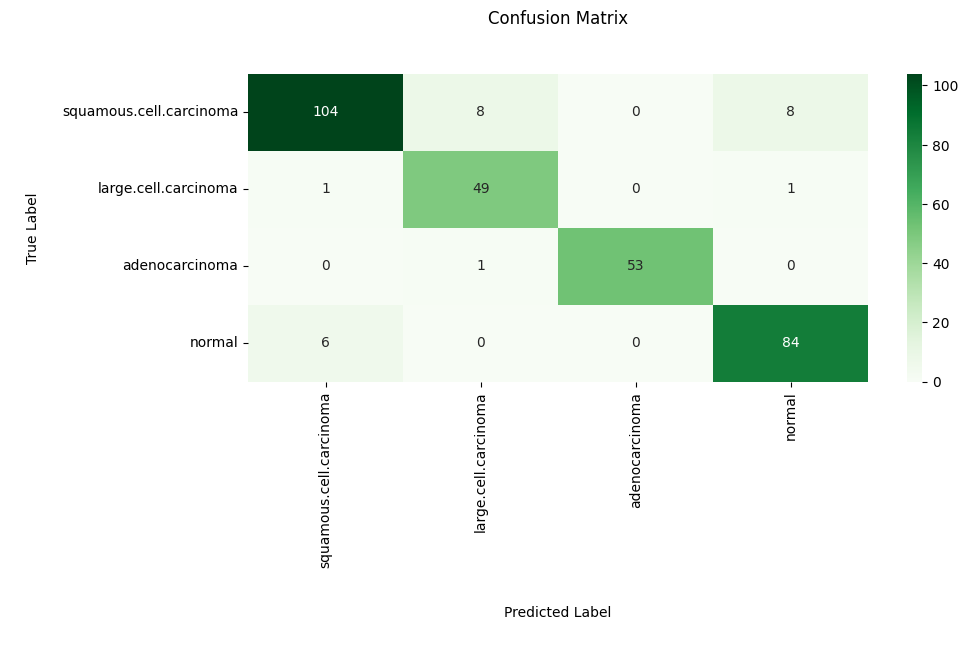

In [18]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

* **Loss Charts**

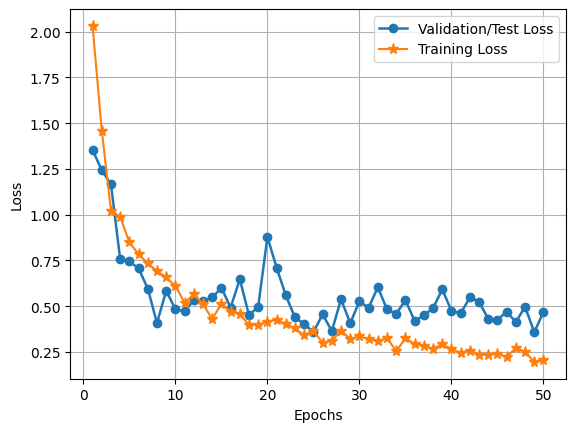

In [19]:
#Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.0)
plt.setp(line2, linewidth = 1.5, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

* **Accuracy Charts**

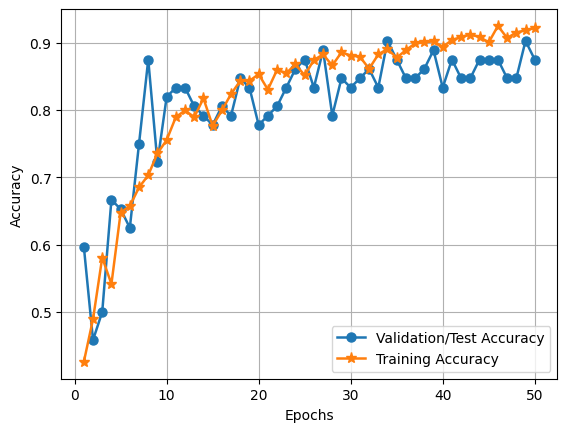

In [20]:
#Plotting the accuracy charts

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,849,102 (117.68 MB)

 Trainable params: 5,377,796 (20.51 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

 Optimizer params: 10,755,594 (41.03 MB)

Chest Cancer Detection Using Deep Learning

Developed a CNN-based model achieving 92% test accuracy in detecting chest cancer from medical images.

Validated performance using classification reports, confusion matrix, and precision/recall metrics.

Implemented advanced data preprocessing and augmentation to enhance model generalization using TensorFlow/Keras.

Also, check for ROC curves for validation of accuracy.
